In [271]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas_datareader import data
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

titanicDF = sb.load_dataset('titanic', encoding='euc-kr')
df = pd.DataFrame(titanicDF)

def getSurvivalRate(v):
    liveCnt=0
    deadCnt=0
    for islive in v :
        if (islive == 'yes'):
            liveCnt = liveCnt + 1
        else:
            deadCnt = deadCnt + 1    
    return round(liveCnt / (liveCnt + deadCnt) * 100, 2)

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [244]:
# 1. deck 컴럼을삭제하고나이(age)의nan 데이터를 나이 평균값으로채우시요. 
df.drop(columns='deck', inplace=True)
df['age'].fillna(round(df['age'].mean(),2), inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.7,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


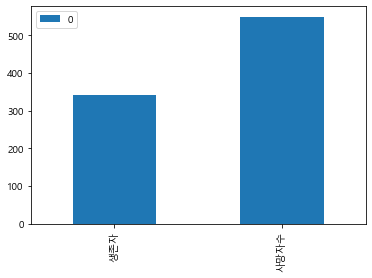

In [251]:
# 2. 생존자와 사망자수를 구하고 바차트를 그리시요.
livePeople = len(df[df['alive'] == 'yes'])
deadPeople = len(df[df['alive'] == 'no'])

d2 = pd.DataFrame([livePeople, deadPeople], index=['생존자', '사망자수'])
d2.plot(kind = 'bar')
plt.show()

In [253]:
# 3. 등급별(pclass) 평균생존률을 구하시요
g = df.groupby('pclass')['alive']
result = g.agg([getSurvivalRate])
result.columns = ['평균 생존율']
result

,평균 생존율
pclass,
1,62.96
2,47.28
3,24.24


In [300]:
# 4. 성별 생존수와 사망수를 구하시요.
manlive = len(df[(df['sex'] == 'male') & (df['alive'] == 'yes')])
mandead = len(df[(df['sex'] == 'male') & (df['alive'] == 'no')])
woolive = len(df[(df['sex'] == 'female') & (df['alive'] == 'yes')])
woodead = len(df[(df['sex'] == 'female') & (df['alive'] == 'no')])

#pd.DataFrame([livePeople, deadPeople], index=['생존자', '사망자수'])
result = pd.DataFrame([manlive, mandead, woolive, woodead], index=['남자생존수', '남자사망수', '여자생존수','여자사망수'])
result.columns = ['Count']
result

,Count
남자생존수,109
남자사망수,468
여자생존수,233
여자사망수,81


In [301]:
# 5. 혼자탑승(alone)한 인원과 함께 탑승한 사람의 평균생존율을구하시요
alon = getSurvivalRate(df[df['alone'] == True]['alive'])
together = getSurvivalRate(df[df['alone'] == False]['alive'])

result = pd.DataFrame([alon, together], index=['혼자 탑승한 사람', '함께 탑승한 사람'])
result.columns = ['평균 생존율']
result

,평균 생존율
혼자 탑승한 사람,30.35
함께 탑승한 사람,50.56


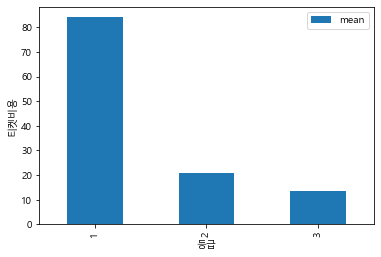

In [317]:
# 6. 등급별티켓비용(fare) 평균을 바차트로그리시요
result = df.groupby('pclass')['fare'].agg([np.mean])
result.plot(kind = 'bar', ylabel='티켓비용', xlabel='등급')
plt.show()

In [292]:
# 7. 나이분류컬럼을 추가하시요 1~15(미성년자), 15~25(청년), 25~35(중년), 35~60(장년), 60~(노년)으로표시하시요.
def fn(age):
    if 1 <= age <= 15:
        return "미성년자"
    elif 15 <= age <= 25:
        return "청년"
    elif 25 <= age <= 35:
        return "중년"
    elif 35 <= age <= 60:
        return "장년"
    else:
        return "노년"

df['나이분류'] = df['age'].apply(fn)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,나이분류
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,청년
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,장년
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,중년
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,중년
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,중년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,중년
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,청년
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,노년
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,중년


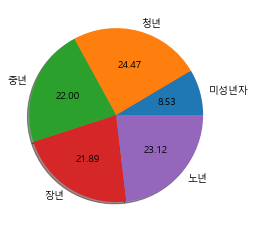

In [315]:
# 8. 나이분류비율(100%기준)을 구하고 파이차트로 표시하시요
ageCnt = []
name = ['미성년자', '청년', '중년', '장년', '노년']
ageCnt.append(len(df[df['나이분류'] == '미성년자']))
ageCnt.append(len(df[df['나이분류'] == '청년']))
ageCnt.append(len(df[df['나이분류'] == '중년']))
ageCnt.append(len(df[df['나이분류'] == '장년']))
ageCnt.append(len(df[df['나이분류'] == '노년']))

plt.pie(agecnt, labels=name, autopct = '%.2f', shadow=True)
plt.show()

In [314]:
#9. 생존율이 가장 높은 나이분류를 구하시요
result = pd.DataFrame()
result['평균 생존율'] = df.groupby('나이분류')['alive'].agg([getSurvivalRate])
result.nlargest(1, '평균 생존율', keep='all')

,평균 생존율
나이분류,
미성년자,55.26


In [313]:
#10. 탑승지역(embark_town)별 평균생존율을 구하시요
result = pd.DataFrame()
result['평균 생존율'] = df.groupby('embark_town')['alive'].agg([getSurvivalRate])
result

,평균 생존율
embark_town,
Cherbourg,55.36
Queenstown,38.96
Southampton,33.70
